In [3]:
%load_ext watermark
%watermark -d -u -a 'Anubhav Dhiman' -v -p numpy,scipy,matplotlib,sklearn

Anubhav Dhiman 
last updated: 2018-01-23 

CPython 3.5.4
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
matplotlib 2.1.0
sklearn 0.19.1


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
ary = np.array([1, 2, 3, 4, 5])
ary_standardized = (ary - ary.mean()) / ary.std()
ary_standardized.round(2)

array([-1.41, -0.71,  0.  ,  0.71,  1.41])

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [13]:
print('mean: %s' % X_train.mean(axis=0))
print('standard deviation: %s' % X_train.std(axis=0))

mean: [ 5.88660714  3.05178571  3.79642857  1.22232143]
standard deviation: [ 0.86741565  0.43424445  1.79264014  0.77916047]


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_scaled = scaler.transform(X_train)

In [17]:
print(X_train_scaled.shape)

(112, 4)


In [18]:
print('mean: %s' % X_train_scaled.mean(axis=0))
print('standard deviation: %s' % X_train_scaled.std(axis=0))

mean: [  1.21331516e-15  -4.41115398e-17   7.13714802e-17   2.57730345e-17]
standard deviation: [ 1.  1.  1.  1.]


In [19]:
X_test_scaled = scaler.transform(X_test)
print('mean: %s' % X_test_scaled.mean(axis=0))
print('standard deviation: %s' % X_test_scaled.std(axis=0))

mean: [-0.19692712  0.0201283  -0.08315118 -0.11983932]
standard deviation: [ 0.77268842  0.98063732  0.91980597  0.89642628]


# PCA

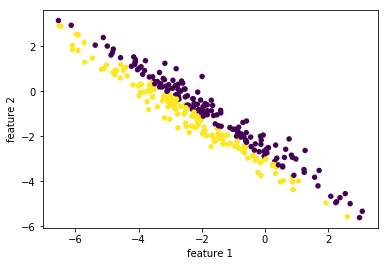

In [24]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

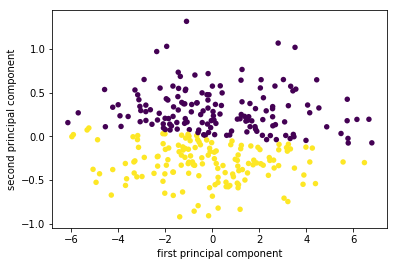

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_blob)
X_pac = pca.transform(X_blob)

plt.scatter(X_pac[:, 0], X_pac[:, 1], c=y, linewidths=0, s=30)
plt.xlabel('first principal component')
plt.ylabel('second principal component');

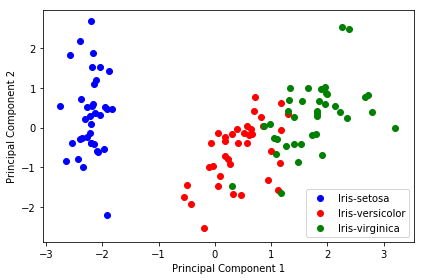

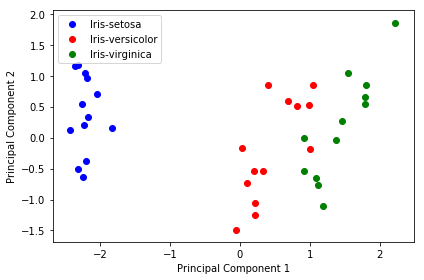

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()